# Notebook Dedicated to Obtain the Probability of Survival and Neutrino flux within the same energy grid through Interpolation

In [14]:
import numpy as np
import pickle

import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy import integrate

# Load Data

In [12]:
# =========  Directories =========

# ------- Normalized Flux -------
flux_dir = 'C:/Users/Acer~/jupyter notebooks/Flux Prediction/normalized solar spectra/data/'
flux_fname_pattern = 'norm_spec_solar_'

# ------- Pee -------
Pee_dir = 'C:/Users/Acer~/jupyter notebooks/Flux Prediction/PSelmaa out/'
Pee_fname_pattern = 'pselmaa_test_sun_pee_'

#  ======== Choose the reaction that produces Nue and the SSM ========
reaction = 'b8'
ssm = 'B16_GS98_'

# ======== Open Files ========

# ---------- Norm Flux ----------
with open(flux_dir + flux_fname_pattern + reaction + '.pickle', 'rb') as handle:
    flux_data = pickle.load(handle)
S_norm = np.array(flux_data['norm_count'])
S_energy = np.array(flux_data['energy'])

# ---------- Pee ----------
PSelmaa_data = np.loadtxt(Pee_dir + Pee_fname_pattern + ssm + reaction + '.txt', skiprows=1)
Pee = PSelmaa_data[:,1]
Pee_energy = PSelmaa_data[:,0]

In [19]:
max(S_energy)

15.6

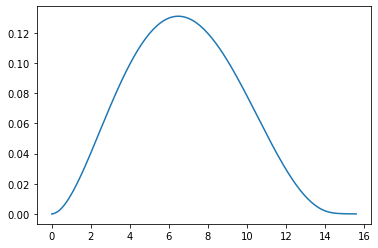

In [16]:
plt.plot(S_energy, S_norm)
plt.show()

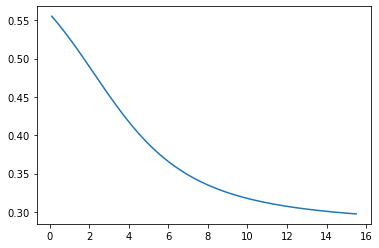

In [17]:
plt.plot(Pee_energy, Pee)
plt.show()

# Create the Interpolation Points

In [20]:
# ====== Define the new energy grid ======

# Energy step
dE = 0.01
# Energy grid limits: Ensure that the values of the flux and Pee are within the ranges
E_min = max(min(S_energy), min(Pee_energy))
E_max = min(max(S_energy), max(Pee_energy))    


E_grid = np.arange(E_min, E_max, dE)

# ====== Interpolation ======

# Functions that interpolates the new points
f_S = interp1d(S_energy, S_norm, kind='linear', bounds_error=False, fill_value=0)
f_Pee = interp1d(Pee_energy, Pee, kind='linear', bounds_error=False, fill_value=0)

# New Points Evaluation
S_interp = f_S(E_grid)
Pee_interp = f_Pee(E_grid)

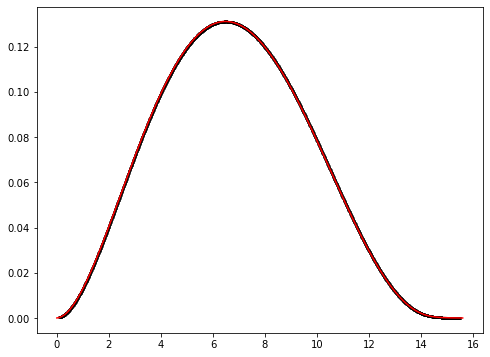

In [39]:
plt.figure(figsize=(8,6))
plt.plot(E_grid, S_interp, color = 'black', marker = 'x', markersize=2)
plt.plot(S_energy, S_norm, color = 'r')
plt.show()

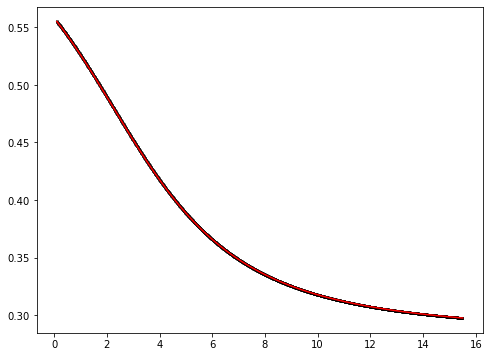

In [35]:
plt.figure(figsize=(8,6))
plt.plot(E_grid, Pee_interp, color = 'black', marker = 'x', markersize=2)
plt.plot(Pee_energy, Pee, color = 'r')
plt.show()